### Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.  These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.

#### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (PCA, etc)
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?


In [65]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import math

import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

    Loading CSV's and checking the columns

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [3]:
display(numerical.shape)
numerical.head(2)

(95412, 315)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.0,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.0,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1


In [4]:
display(categorical.shape)
categorical.head(2)

(95412, 22)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10


In [5]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

    Converting all categorical columns to object so they can be encoded.

In [6]:
categorical = categorical.astype(object)

In [ ]:
categorical.dtypes

In [8]:
display(targets.shape)
targets.head(2)

(95412, 2)

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0


    Concatenating the main dataframe and doing the X_y Split

In [9]:
data = pd.concat([numerical, categorical], axis = 1)
display(data.shape)
data.head(2)

(95412, 337)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.0,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,1,46.0,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10


In [10]:
X = data
y = targets

X_train, X_test, y_train, y_test = train_test_split(X, y['TARGET_B'], test_size=0.2, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(np.object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(np.object)

# OneHotEncode - transformer + cols
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns = cols).reset_index(drop = True)  
X_test_cat = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns = cols).reset_index(drop = True)

In [11]:
X_train_cat.shape

(76329, 316)

In [12]:
X_test_cat.shape

(19083, 316)

In [13]:
# Standard scaler function to normalize numerical columns 
transformer = StandardScaler().fit(X_train_num)

X_train_num_scaled = pd.DataFrame(transformer.transform(X_train_num), columns = X_train_num.columns)
X_test_num_scaled = pd.DataFrame(transformer.transform(X_test_num), columns = X_test_num.columns)

    Concatenating Xtrain categorical, numerical and y as we need to upsample the data. Also concatenating X_test to original form

In [14]:
y_train = y_train.reset_index(drop = True)
train_df = pd.concat([X_train_cat,X_train_num_scaled, y_train], axis = 1)
X_test = pd.concat([X_test_cat,X_test_num_scaled], axis = 1)

**Verifying the imbalance visually and upsampling**

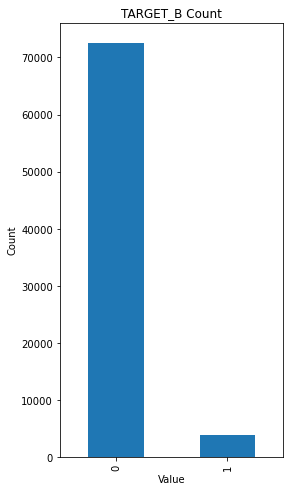

In [15]:
ax = train_df['TARGET_B'].value_counts().plot(kind='bar',
                                    figsize=(4,8),
                                    title="TARGET_B Count")
ax.set_xlabel("Value")
ax.set_ylabel("Count")
plt.show()

In [16]:
cat_1 = train_df[train_df['TARGET_B'] == 1]
cat_0 = train_df[train_df['TARGET_B'] == 0]

cat_1_upsampled = resample(cat_1, replace=True, n_samples = len(cat_0))
s_data_upsampled = pd.concat([cat_1_upsampled, cat_0], axis=0)

In [17]:
X_train_up = s_data_upsampled.drop(columns=['TARGET_B'])
y_train_up = s_data_upsampled['TARGET_B']

**Building the first base model**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

def model_f(X_m,y_m,X_t,y_t):
    clf = RandomForestClassifier(max_depth=5,
                                 n_jobs =-1,
                                 min_samples_split=20,
                                 min_samples_leaf =20,
                                 max_samples=0.2)

    clf.fit(X_m, y_m)
    print('Train score:', round(clf.score(X_m, y_m),2)*100)
    print('Test score:', round(clf.score(X_t, y_t),2)*100)

    y_pred = clf.predict(X_t)
    print('\n Y test real Values\n',y_t.value_counts())
    display(confusion_matrix(y_t, y_pred))
    return None

In [19]:
model_f(X_train_up, y_train_up, X_test, y_test)

Train score: 62.0
Test score: 59.0

 Y test real Values
 0    18083
1     1000
Name: TARGET_B, dtype: int64


array([[10721,  7362],
       [  447,   553]], dtype=int64)

**Feature selections**

In [ ]:
X_added_constant = sm.add_constant(X_train_up)
X_added_constant
model = sm.OLS(y_train_up,X_added_constant).fit()
model.summary()

In [ ]:
#creating the dataframe with osl results
results_as_html = model.summary().tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]

# sorting by P val
df = df.sort_values(by = ['P>|t|'], ascending = False)
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'column'})

# Listing the best features based on p<0.03
best_features = list(df['column'][df['P>|t|']<0.03])

    Making new Xtrain and test sets with the OSL most relevant columns, and modeling

In [22]:
X_tmp_train = X_train_up[best_features]
X_tmp_test = X_test[best_features]

model_f(X_tmp_train, y_train_up, X_tmp_test, y_test)

Train score: 62.0
Test score: 57.99999999999999

 Y test real Values
 0    18083
1     1000
Name: TARGET_B, dtype: int64


array([[10436,  7647],
       [  431,   569]], dtype=int64)

**PCA Feature selection**

In [23]:
pca = PCA(0.9)
pca.fit(X_train_up)

X_train_pca = pca.transform(X_train_up)
X_test_pca = pca.transform(X_test)

corr_pc = pd.DataFrame(X_train_pca).corr()

Text(0.5, 1.0, 'PCA Correlation')

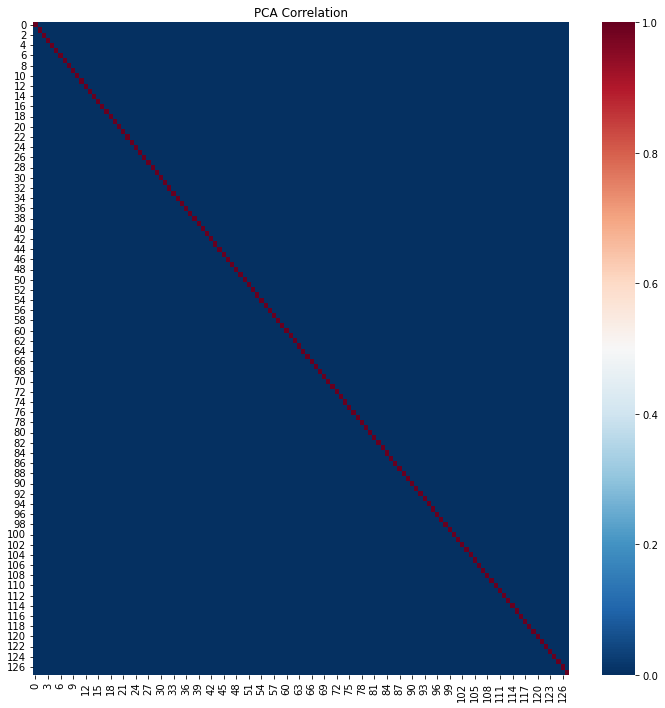

In [24]:
figure(figsize=(12, 12))
sns.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=False)
plt.title('PCA Correlation')

    Ploting for decreasing impact of columns into explained variance

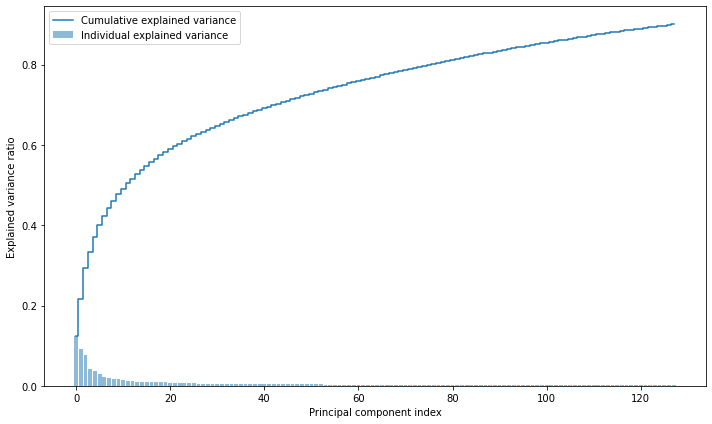

In [25]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

figure(figsize=(10, 6))
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
model_f(X_train_pca, y_train_up, X_test_pca, y_test)

Train score: 65.0
Test score: 69.0

 Y test real Values
 0    18083
1     1000
Name: TARGET_B, dtype: int64


array([[12664,  5419],
       [  559,   441]], dtype=int64)

**A take on Random Forest Hyper tunning**

In [27]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= list(range(2,20))
min_samples_split_choices = list(range(2,20))
min_samples_leaf_choices = list(range(2,20))
max_samples = [0.1,0.2,0.3]

In [28]:
random_grid = {'max_depth': max_depth_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_samples': max_samples}

In [29]:
model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_jobs = -1)

In [30]:
random_search.fit(X_train_pca,y_train_up)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_samples': [0.1, 0.2, 0.3],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19]})

In [31]:
random_search.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 11,
 'max_samples': 0.2,
 'max_depth': 18}

In [32]:
print('Train score:', round(random_search.score(X_train_pca, y_train_up),2)*100)
print('Test score:', round(random_search.score(X_test_pca, y_test),2)*100)

y_pred = random_search.predict(X_test_pca)
print('\n Y test real Values\n',y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

Train score: 100.0
Test score: 94.0

 Y test real Values
 0    18083
1     1000
Name: TARGET_B, dtype: int64


array([[17888,   195],
       [  981,    19]], dtype=int64)

**Conclusions**
***
Our train and test data are really skewed, so making a good model is actually really dificult because it really depends on how our client wants to approach the problem because is target is to identify potential donors, so the most important feature of the model is to correctly identify them.
That said I can't say we have a reliable model. We have 4 models using very diferent aproaches. but actually the one who better identifies potencial donnors is the not hyper-tunned Random forest classifier, with a test score 69 catching almos 50% of the potencial donors and nearly 70% of non-donors.
Since this model main objective will probably be to decide to wich people we should direct markting or send mail it could be used as a guideline.
***
***NB:*** Predicting this scenario will always be extremelly dificult because our test data only has 5% donors

### Lab | Final regression model in "Health Care for All" Case

#### Instructions

At this point, we have created a model to predict who will make a donation and who won't. But, what about the ammount of money that each person will give?
In this lab, subset those that made a donation and use that subset to create a model to predict how much money will they give.

Evaluate the result of your model and estimate how much better the result are for the bussiness in comparison with the naive scenario we discuss on Monday.


In [66]:
# Filtering the donors
regr_df = pd.concat([data,targets], axis = 1)
regr_df = regr_df[regr_df['TARGET_B'] == 1].drop(columns = ['TARGET_B'])

# X-Y Split
X = regr_df.drop(columns = ['TARGET_D'])
y = regr_df['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [67]:
# OneHotEncode - transformer + cols
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns = cols).reset_index(drop = True)  
X_test_cat = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns = cols).reset_index(drop = True)

In [68]:
# Standard Scaler function to normalize continuous columns 
transformer = StandardScaler().fit(X_train_num)

X_train_num_scaled = pd.DataFrame(transformer.transform(X_train_num), columns = X_train_num.columns)
X_test_num_scaled = pd.DataFrame(transformer.transform(X_test_num), columns = X_test_num.columns)

# Reseting indexes
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [69]:
X_train = pd.concat([X_train_cat,X_train_num_scaled], axis = 1)
X_test = pd.concat([X_test_cat,X_test_num_scaled], axis = 1)

    Modeling our baseline model

In [70]:
def model_regr(X_m,y_m,X_t,y_t):
    clf = RandomForestRegressor(n_jobs = -1)
    clf.fit(X_m, y_m)
    print('Train score:', round(clf.score(X_m, y_m),2)*100)
    print('Test score:', round(clf.score(X_t, y_t),2)*100)
    MSE = mean_squared_error(y_test, model.predict(X_test[['AVGGIFT','LASTGIFT','CLUSTER_16']]))
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:",RMSE,'\n')
    return None

In [71]:
model_regr(X_train,y_train,X_test,y_test)

Train score: 93.0
Test score: 41.0
Root Mean Square Error: 11.20090102744531 



**Searching for hiper tunning best parameters/model**

In [72]:
model = RandomForestRegressor()
random_grid['max_samples'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_jobs = -1)

random_search.fit(X_train,y_train)

display(random_search.best_params_)
display(random_search.best_score_)

{'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_samples': 0.7,
 'max_depth': 13}

0.5422927408959924

In [73]:
# Model score for the test set
round(random_search.score(X_test, y_test),2)*100

43.0

**OLS feature selection**

In [ ]:
X_added_constant = sm.add_constant(X_train_num_scaled)
X_added_constant
model = sm.OLS(y_train,X_added_constant).fit()
model.summary()

In [75]:
results_as_html = model.summary().tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]

# sorting by P val
df = df.sort_values(by = ['P>|t|'], ascending = False)
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'column'})

# Listing the best features based on p<0.05
best_features = list(df['column'][df['P>|t|']<0.05])
best_features.remove('const')

In [76]:
X_train_OLS = X_train[best_features]
X_test_OLS = X_test[best_features]

**Ploting column importances and acessing best models**

In [77]:
def plot_feature_importances(model, t = 0.005):
    column_rel = pd.DataFrame([list(X_train.columns),list(model.feature_importances_)]).T
    column_rel.columns = ['column', 'val']
    top_cols = column_rel[column_rel['val']>t]
    
    figure(figsize=(8, 4), dpi=80)
    n_features = top_cols.shape[0]
    plt.barh(range(n_features), top_cols['val'], align='center')
    plt.yticks(np.arange(n_features), top_cols['column'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    return list(top_cols['column'])

In [78]:
models = []
# Ideal settings previouly calculated with randomized search
models.append(RandomForestRegressor(min_samples_split = 7,
                                    min_samples_leaf = 6,
                                    max_samples = 0.4,
                                    max_depth = 14,
                                    n_jobs = -1))
models.append(Ridge(alpha=1.0))
models.append(SVR(kernel = 'rbf', C=1.0, epsilon=0.2))
models.append(SVR(kernel = 'linear', C=1.0, epsilon=0.2))
models.append(LinearRegression())
models.append(KNeighborsRegressor())

**Scores with all features**

RandomForestRegressor
Train score: 66.0
Test score: 45.0
Root Mean Square Error: 10.266082321855214 

Ridge
Train score: 64.0
Test score: 34.0
Root Mean Square Error: 11.177372658252878 

No feature importance class for this model
SVR
Train score: 28.000000000000004
Test score: 18.0
Root Mean Square Error: 12.5248113811169 

No feature importance class for this model
SVR
Train score: 43.0
Test score: 44.0
Root Mean Square Error: 10.312724173921366 

No feature importance class for this model
LinearRegression
Train score: 64.0
Test score: 34.0
Root Mean Square Error: 11.191592252306187 

No feature importance class for this model
KNeighborsRegressor
Train score: 43.0
Test score: 4.0
Root Mean Square Error: 13.538812407884699 

No feature importance class for this model


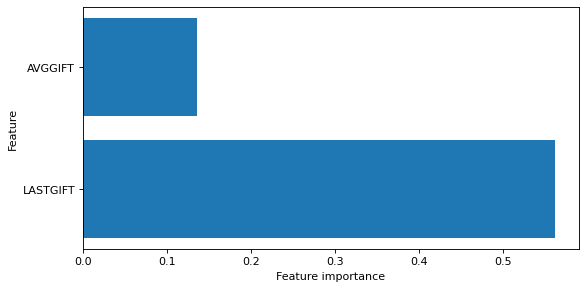

In [80]:
for model in models:
    model.fit(X_train,y_train)
    print(type(model).__name__)
    print('Train score:', round(model.score(X_train, y_train),2)*100)
    print('Test score:', round(model.score(X_test, y_test),2)*100)
    MSE = mean_squared_error(y_test, model.predict(X_test))
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:",RMSE,'\n')
    try:
        plot_feature_importances(model,0.05)
    except:
        print('No feature importance class for this model')

**Scores with all OLS trimmed features**

RandomForestRegressor
Train score: 64.0
Test score: 44.0
Root Mean Square Error: 10.344437203114698 

Ridge
Train score: 54.0
Test score: 38.0
Root Mean Square Error: 10.890965241623764 

No feature importance class for this model
SVR
Train score: 35.0
Test score: 31.0
Root Mean Square Error: 11.45598496496978 

No feature importance class for this model
SVR
Train score: 28.999999999999996
Test score: 42.0
Root Mean Square Error: 10.535398760996005 

No feature importance class for this model
LinearRegression
Train score: 54.0
Test score: 38.0
Root Mean Square Error: 10.891424141902503 

No feature importance class for this model
KNeighborsRegressor
Train score: 59.0
Test score: 26.0
Root Mean Square Error: 11.91321893577738 

No feature importance class for this model


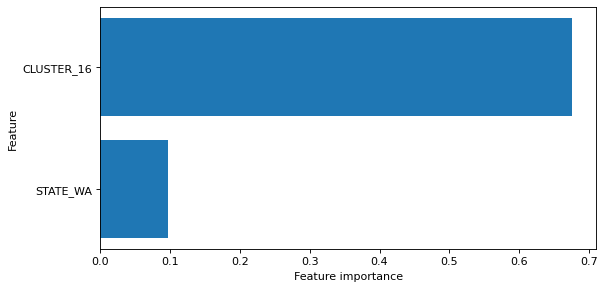

In [82]:
for model in models:
    model.fit(X_train_OLS,y_train)
    print(type(model).__name__)
    print('Train score:', round(model.score(X_train_OLS, y_train),2)*100)
    print('Test score:', round(model.score(X_test_OLS, y_test),2)*100)
    MSE = mean_squared_error(y_test, model.predict(X_test_OLS))
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:",RMSE,'\n')
    try:
        plot_feature_importances(model,0.05)
    except:
        print('No feature importance class for this model')
        

**Conclusions**
***
Our initial model with the default regressor provides us the best regression score on train set, and an acceptable result in the test score and rmse.
   
With tinkering we can push it up a bit on the test set scores and rmse. We can identify also by ploting the importance to result of columns that the the 4 columns that mos impact the result are AVG GIFT, LAST GIFT, CLUSTER_16 and STATE_WA. The two first ones might indicate us that future gifts are most influenced by previous gifts. We can also say that the state of washington is a donnorfactor. Also now we know that clients of cluster 16 are more correlated to gifting.
   
All in the model maybe marginally usable, but as we know everything bellow 50% is essencially like a flip of a coin.
***
NB: Out of curiosity I modeled with just ['AVGGIFT','LASTGIFT','CLUSTER_16'] and as you can see bellow the results are the same, even improving slightly for random forest, with a computacional time way lower.

In [89]:
for model in models:
    # For cross validation
    model.fit(X_train[['AVGGIFT','LASTGIFT','CLUSTER_16']],y_train)
    print(type(model).__name__)
    print('Train score:', round(model.score(X_train[['AVGGIFT','LASTGIFT','CLUSTER_16']], y_train),2)*100)
    print('Test score:', round(model.score(X_test[['AVGGIFT','LASTGIFT','CLUSTER_16']], y_test),2)*100)
    MSE = mean_squared_error(y_test, model.predict(X_test[['AVGGIFT','LASTGIFT','CLUSTER_16']]))
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:",RMSE,'\n')

RandomForestRegressor
Train score: 57.99999999999999
Test score: 45.0
Root Mean Square Error: 10.209710634666804 

Ridge
Train score: 44.0
Test score: 33.0
Root Mean Square Error: 11.276744714404984 

SVR
Train score: 43.0
Test score: 40.0
Root Mean Square Error: 10.706201172134584 

SVR
Train score: 20.0
Test score: 41.0
Root Mean Square Error: 10.642470964708762 

LinearRegression
Train score: 44.0
Test score: 33.0
Root Mean Square Error: 11.277393476236007 

KNeighborsRegressor
Train score: 54.0
Test score: 34.0
Root Mean Square Error: 11.20090102744531 

